<a href="https://colab.research.google.com/github/AI-Amponsah/Driver_Drowsiness-Detection-FinalYearProject/blob/main/Driver_Drowsiness_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraries

In [4]:
import numpy as np
import tensorflow_datasets as tfds
from keras.layers import Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras import layers
from google.colab import drive


In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# load datasets

In [6]:
train_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset_new/train",
    shuffle=True,
    batch_size=32
)

Found 2467 files belonging to 4 classes.


In [7]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset_new/test",
    shuffle=True,
    batch_size=32
)

Found 433 files belonging to 4 classes.


In [3]:
# printing classes

In [8]:
class_names = test_set.class_names
class_names

['Closed', 'Open', 'no_yawn', 'yawn']

In [9]:
class_names = train_set.class_names
class_names

['Closed', 'Open', 'no_yawn', 'yawn']

In [37]:
# len(test_set)

14

In [ ]:
# len(train_set)

In [10]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])


In [11]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])


In [12]:
train_set = train_set.map(lambda x, y: (resize_and_rescale(x), y))
train_set = train_set.map(lambda x, y: (data_augmentation(x, training=True), y))

test_set = test_set.map(lambda x, y: (resize_and_rescale(x), y))


In [ ]:
# printing the values of a batch

In [13]:
for image_batch, label_batch in train_set.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 180, 180, 3)
[2 2 1 3 3 3 0 0 1 3 1 1 2 1 1 3 0 0 1 2 0 3 1 0 3 2 3 3 3 0 0 3]


In [ ]:
for image_batch, label_batch in train_set.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    # plt.show()

In [62]:
# Building Model

In [14]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 60
history = model.fit(
  train_set,
  validation_data=test_set,
  epochs=epochs
)

Epoch 1/60
78/78 [==============================] - 342s 4s/step - loss: 0.8944 - accuracy: 0.5813 - val_loss: 0.5293 - val_accuracy: 0.7298
Epoch 2/60
78/78 [==============================] - 102s 1s/step - loss: 0.4714 - accuracy: 0.7637 - val_loss: 0.4713 - val_accuracy: 0.7436
Epoch 3/60
78/78 [==============================] - 101s 1s/step - loss: 0.4344 - accuracy: 0.7750 - val_loss: 0.5096 - val_accuracy: 0.7344
Epoch 4/60
78/78 [==============================] - 107s 1s/step - loss: 0.4243 - accuracy: 0.7815 - val_loss: 0.4377 - val_accuracy: 0.7783
Epoch 5/60
78/78 [==============================] - 95s 1s/step - loss: 0.4149 - accuracy: 0.7807 - val_loss: 0.4220 - val_accuracy: 0.7852
Epoch 6/60
78/78 [==============================] - 102s 1s/step - loss: 0.4007 - accuracy: 0.7896 - val_loss: 0.4249 - val_accuracy: 0.7506
Epoch 7/60
78/78 [==============================] - 96s 1s/step - loss: 0.4165 - accuracy: 0.7884 - val_loss: 0.4179 - val_accuracy: 0.7598
Epoch 8/60
78/7

In [65]:
# Model Evaluation

In [15]:
test_loss, test_accuracy = model.evaluate(test_set)

print("Test Accuracy:",test_accuracy )
print("Test Loss:", test_loss)

14/14 [==============================] - 6s 305ms/step - loss: 0.1732 - accuracy: 0.9353
Test Accuracy: 0.9353348612785339
Test Loss: 0.17316125333309174


In [16]:
prediction = model.predict(test_set)

14/14 [==============================] - 7s 354ms/step


In [17]:
model.save('/content/drive/MyDrive/dataset_new/driver_drowsiness_modelCNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


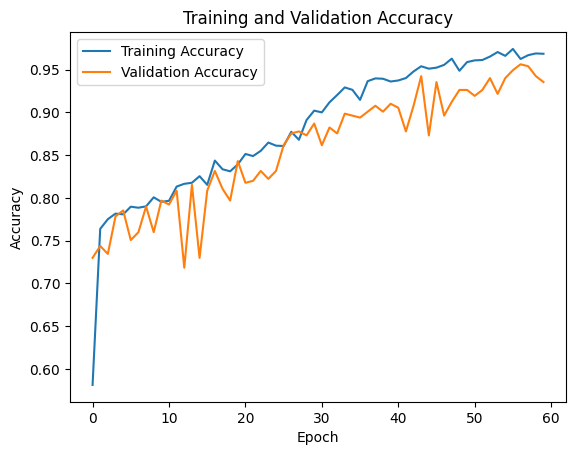

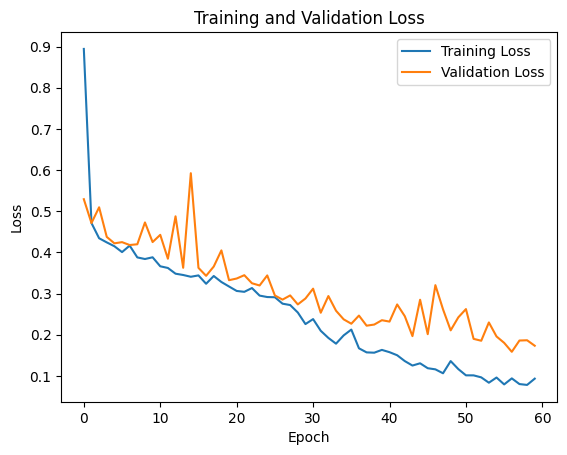

In [18]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()



In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 64)       